本筆記根據[Tensorflow beginner notebook](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb)進行修改練習。

In [264]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


用(x_train, y_train), (x_test, y_test) = mnist.load_data()叫進來時，x_train的shape是(60000,28,28)。dtype是uint8，可能值為0,1,2,...,255。每一樣本為一28x28的灰階影像。字跡較白，背景黑色。

用x_train, x_test = x_train / 255.0, x_test / 255.0轉換後x_train的dtype是float64，每一元素的值介於0與1之間。用來做模型的Input。

In [265]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,x_train.dtype)
print(tf.math.bincount(x_train[0]))
print(tf.reduce_sum(tf.math.bincount(x_train[0])))
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28) uint8
tf.Tensor(
[618   2   3   1   0   0   0   0   0   1   0   3   0   0   1   0   2   0
   5   0   0   0   0   1   1   1   1   1   0   0   1   0   0   0   0   1
   1   0   0   2   0   0   0   1   0   1   1   0   0   1   0   0   0   0
   0   1   1   0   0   0   0   0   0   0   2   0   1   0   0   0   1   0
   0   0   0   0   0   0   1   0   2   2   2   0   0   0   0   0   0   0
   1   0   0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   1
   1   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0
   1   1   0   0   1   0   1   1   0   1   2   0   0   1   0   0   0   0
   0   0   0   0   1   0   1   0   0   0   3   0   1   0   0   0   1   0
   0   0   0   0   1   0   0   0   1   1   2   0   0   1   0   0   0   0
   0   0   2   1   0   0   1   1   0   0   2   0   0   0   0   2   0   0
   2   0   0   1   0   0   0   1   0   1   0   0   0   0   1   1   0   0
   0   0   0   2   0   1   0   0   0   2   1   0   0   1   0   0   0   0
   0   0   0   0  

In [266]:
x_train[0], x_train[0].dtype, x_train[0].shape

(array([[0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      ],
        [0.      , 0. 

In [267]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

**%precison** is one of magic commands of ipython
[built-in magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

若 images 為由n個值為0與1之間的28x28影像陣列，則tf.nn.softmax(model(images).numpy()).numpy()為nx10的機率陣列，第k列為第k個影像歸類為0,1,2,...,9的機率。

In [268]:
%precision 6
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.071823,  0.101864,  0.092429, -0.793982, -0.643124, -0.463236,
        -0.067818,  1.056141,  0.613987, -0.339115]], dtype=float32)

In [269]:
tf.nn.softmax(predictions).numpy()

array([[0.083759, 0.099647, 0.098711, 0.040682, 0.047306, 0.05663 ,
        0.084095, 0.258762, 0.166294, 0.064113]], dtype=float32)

loss_fn 為SparseCategoricalCrossentropy(from_logits=True)，$-\log(p)$

In [270]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [271]:
print(y_train[:1])
label=y_train[:1][0]
p = tf.math.exp(predictions[0][label])/tf.reduce_sum(tf.math.exp(predictions[0]))
print(-tf.math.log(tf.nn.softmax(predictions).numpy()[0][label]))
print(-tf.math.log(p))

[5]
tf.Tensor(2.871223, shape=(), dtype=float32)
tf.Tensor(2.871223, shape=(), dtype=float32)


In [272]:
loss_fn(y_train[:1], predictions).numpy()

2.871223

In [273]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [274]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2946 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1453 - accuracy: 0.9570
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1098 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0880 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0771 - accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0672 - accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0604 - accuracy: 0.9800
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0542 - accuracy: 0.9824
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0490 - accuracy: 0.9843
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.044

In [275]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0729 - accuracy: 0.9799 - 377ms/epoch - 1ms/step


[0.072927, 0.979900]

In [276]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [277]:
import numpy as np
def predict(gray28s):
    p=probability_model(gray28s)
    print(p)
    return np.argmax(p, axis=-1)

In [278]:
predict(x_test[:10])

tf.Tensor(
[[3.782703e-08 1.543670e-11 8.274889e-09 5.885368e-05 9.064292e-14
  5.764040e-08 9.417156e-15 9.999374e-01 3.127238e-08 3.674439e-06]
 [4.535126e-10 7.585895e-06 9.999903e-01 1.118330e-06 7.798512e-17
  6.816577e-07 5.523665e-11 1.113207e-14 2.274739e-07 3.670922e-16]
 [6.603802e-09 9.998137e-01 9.992798e-05 4.957998e-08 2.930561e-06
  3.238018e-08 6.623172e-07 7.866404e-05 4.018140e-06 1.148156e-08]
 [9.999982e-01 1.324749e-12 2.753552e-08 1.557938e-11 1.949859e-08
  2.042569e-08 6.089574e-07 1.024295e-06 2.713570e-10 1.144427e-07]
 [3.499275e-08 5.408402e-12 8.452307e-08 6.016026e-10 9.996932e-01
  5.156218e-08 6.179403e-09 1.523291e-05 3.801725e-08 2.914589e-04]
 [1.697179e-10 9.999272e-01 3.331839e-07 3.921959e-09 2.131036e-06
  1.322929e-10 2.434689e-09 7.005812e-05 2.483919e-07 4.048633e-09]
 [3.085273e-14 7.476353e-11 6.875696e-12 2.315695e-11 9.999861e-01
  6.744621e-09 2.064310e-11 5.743808e-06 8.159784e-06 7.311620e-08]
 [4.404961e-10 2.359922e-08 1.499911e-05 6.3

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [279]:
p= probability_model(x_test[:10])
print(p)
v = np.argmax(p,axis=-1)
print(v)

tf.Tensor(
[[3.782703e-08 1.543670e-11 8.274889e-09 5.885368e-05 9.064292e-14
  5.764040e-08 9.417156e-15 9.999374e-01 3.127238e-08 3.674439e-06]
 [4.535126e-10 7.585895e-06 9.999903e-01 1.118330e-06 7.798512e-17
  6.816577e-07 5.523665e-11 1.113207e-14 2.274739e-07 3.670922e-16]
 [6.603802e-09 9.998137e-01 9.992798e-05 4.957998e-08 2.930561e-06
  3.238018e-08 6.623172e-07 7.866404e-05 4.018140e-06 1.148156e-08]
 [9.999982e-01 1.324749e-12 2.753552e-08 1.557938e-11 1.949859e-08
  2.042569e-08 6.089574e-07 1.024295e-06 2.713570e-10 1.144427e-07]
 [3.499275e-08 5.408402e-12 8.452307e-08 6.016026e-10 9.996932e-01
  5.156218e-08 6.179403e-09 1.523291e-05 3.801725e-08 2.914589e-04]
 [1.697179e-10 9.999272e-01 3.331839e-07 3.921959e-09 2.131036e-06
  1.322929e-10 2.434689e-09 7.005812e-05 2.483919e-07 4.048633e-09]
 [3.085273e-14 7.476353e-11 6.875696e-12 2.315695e-11 9.999861e-01
  6.744621e-09 2.064310e-11 5.743808e-06 8.159784e-06 7.311620e-08]
 [4.404961e-10 2.359922e-08 1.499911e-05 6.3

In [280]:
from matplotlib import pyplot as plt
digit=(x_train[4]*255).astype('uint8')


In [281]:
digit


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

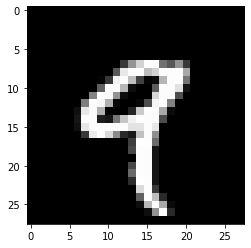

In [282]:
plt.imshow(digit, cmap=plt.cm.gray)
plt.show()

7 7


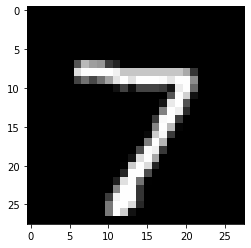

2 2


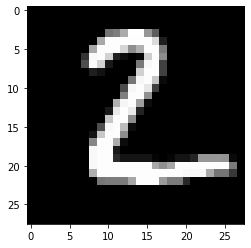

1 1


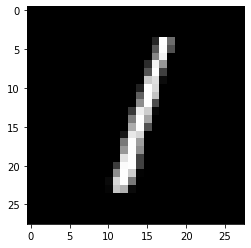

0 0


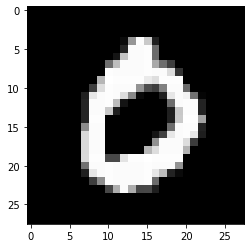

4 4


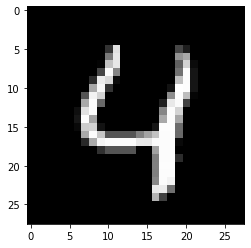

1 1


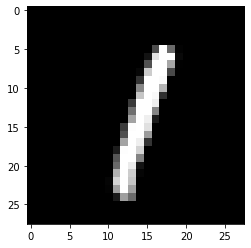

4 4


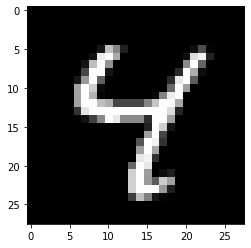

9 9


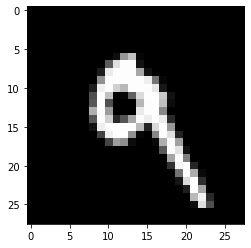

5 5


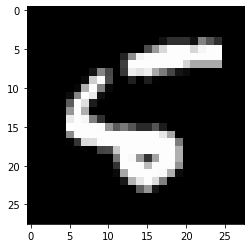

9 9


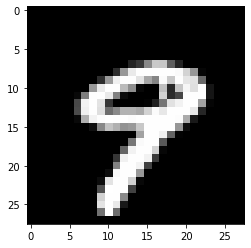

In [283]:
for i in range(10):
    plt.imshow((x_test[i]*255).astype('uint8'), cmap=plt.cm.gray)
    print(y_test[i], v[i])
    plt.show()

In [284]:
import matplotlib.image as img
import cv2

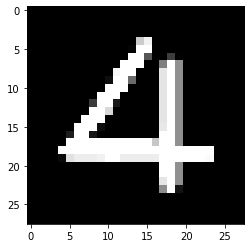

In [295]:
imgname = "b-four-fat.png"
image = img.imread(imgname)
#image.resize(28,28)
plt.imshow(image)
plt.show()

In [296]:
myimg = cv2.imread(imgname, cv2.IMREAD_UNCHANGED)
#img = (img*255)
#print(img)
print(myimg.shape, myimg.dtype)
#print(np.max(img,axis=1))
gray = cv2.cvtColor(myimg, cv2.COLOR_BGRA2GRAY)
print(gray.shape, gray.dtype)
gray28 = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
print(gray28.shape,gray28.dtype)
print(tf.math.bincount(gray28))
print(tf.reduce_sum(tf.math.bincount(gray28)))

(28, 28, 4) uint8
(28, 28) uint8
(28, 28) uint8
tf.Tensor(
[643   1   0   0   1   0   0   0   0   0   1   0   0   0   2   0   0   0
   0   1   0   1   0   0   1   0   0   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   1   0   0   0   8   0   0 

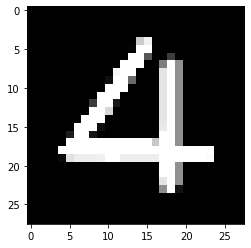

In [297]:
#cv2.imshow("Resized image",gray28)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(gray28, cmap=plt.cm.gray)
plt.show()

In [298]:
np.array([gray28/255.0]).shape

(1, 28, 28)

In [299]:
predict(np.array([gray28/255.0]))[0]

tf.Tensor(
[[4.691113e-07 3.472961e-13 6.260726e-06 1.680604e-08 9.977996e-01
  5.063862e-08 7.366133e-08 4.703246e-10 1.257304e-11 2.193501e-03]], shape=(1, 10), dtype=float32)


4

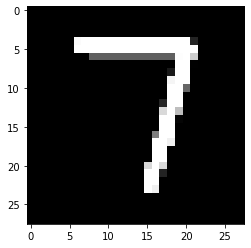

In [290]:
plt.imshow(gray28, cmap=plt.cm.gray)
plt.show()

In [291]:
import numpy as np
np.max(image), np.min(image)

(1.0, 0.0)

In [292]:
image1=(image*255).astype("uint8")

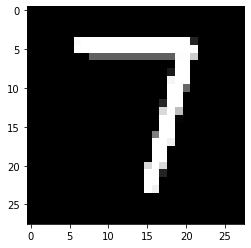

In [293]:
plt.imshow(image1)
plt.show()

In [294]:
np.max(image1), np.min(image1), image1.shape

(255, 0, (28, 28, 4))

用[ixartz 網頁](https://digit-recognition.ixartz.com/)製作加粗的數字，以mypredic函數辨識，只有7失敗，為什麼？

In [304]:
def mypredict(imgname):
    myimg = cv2.imread(imgname, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(myimg, cv2.COLOR_BGRA2GRAY)
    gray28 = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    d = predict(np.array([gray28/255.0]))[0]
    print(imgname, d)

In [310]:
mypredict("b-seven-fat-4.png")

tf.Tensor(
[[1.488304e-08 2.866563e-03 2.973377e-03 4.136656e-02 3.281711e-08
  3.220769e-06 8.416683e-11 9.517937e-01 9.423741e-04 5.420235e-05]], shape=(1, 10), dtype=float32)
b-seven-fat-4.png 7


In [309]:
for name in ["b-zero-fat.png","b-one-fat.png","b-two-fat.png","b-three-fat.png","b-four-fat.png","b-five-fat.png","b-six-fat.png","b-seven-fat.png","b-eight-fat.png","b-nine-fat.png"]:
    mypredict(name)

tf.Tensor(
[[9.999969e-01 1.006485e-13 8.850233e-07 1.654971e-10 3.563310e-11
  1.617526e-09 2.717087e-11 1.694719e-06 9.836841e-13 5.398788e-07]], shape=(1, 10), dtype=float32)
b-zero-fat.png 0
tf.Tensor(
[[4.493842e-09 9.999813e-01 6.525779e-06 8.346554e-09 1.167135e-06
  2.148406e-09 2.320863e-06 3.159959e-07 8.353151e-06 1.670472e-10]], shape=(1, 10), dtype=float32)
b-one-fat.png 1
tf.Tensor(
[[2.745133e-10 1.585871e-08 9.999144e-01 8.541268e-05 2.457056e-19
  3.806437e-10 1.087087e-15 5.425583e-09 8.771240e-08 3.234214e-12]], shape=(1, 10), dtype=float32)
b-two-fat.png 2
tf.Tensor(
[[1.144309e-17 4.174902e-11 4.528560e-07 9.999944e-01 7.644173e-18
  5.156086e-06 6.183043e-21 1.643421e-12 3.459816e-10 2.520641e-11]], shape=(1, 10), dtype=float32)
b-three-fat.png 3
tf.Tensor(
[[4.691113e-07 3.472961e-13 6.260726e-06 1.680604e-08 9.977996e-01
  5.063862e-08 7.366133e-08 4.703246e-10 1.257304e-11 2.193501e-03]], shape=(1, 10), dtype=float32)
b-four-fat.png 4
tf.Tensor(
[[1.504847e-15 